## Задание 1

Сотрудник службы оценки качества продукции заметил, что число бракованных листов стали в партии для стали марки A больше, чем для стали марки B. Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки A.  

Обоснуйте, что:

1)	Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.

2)	При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки. 

Данные, необходимые для анализа, содержатся в файле «Статистика за 2018 год». Количество листов стали в каждой партии предполагается одинаковым. 


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\8 Тестовые задания\\Северсталь\\Статистика за 2018 год.csv', 
                   encoding = 'cp1251')

In [29]:
df.head()

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


In [30]:
#пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
Число бракованных листов    237 non-null int64
Скорость прокатки           237 non-null float64
Марка стали                 237 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [32]:
# много одинаковых строк - дубликаты или просто партии с одинаковыми характеристиками?
# для данного задания буду считать, что повторяющиеся строки - это не дубликаты
df_dd = stat.drop_duplicates()
df_dd.shape

(167, 3)

In [24]:
# в статистике 139 партий марки А и 98 партий марки B
df.groupby('Марка стали').count().reset_index()

,Марка стали,Число бракованных листов,Скорость прокатки
0,A,139,139
1,B,98,98


In [37]:
# общие статистические показатели по датасету
df.describe()

,Число бракованных листов,Скорость прокатки
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


Text(0, 0.5, 'партий')

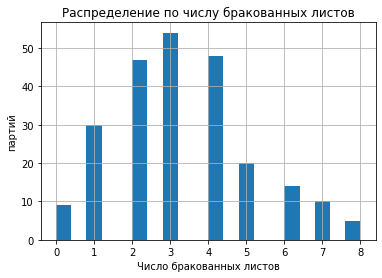

In [49]:
# распределение близко к нормальному. Чаще всего в партии 2-4 бракованных листа. Реже всего встречаются партии с 8 бракованными
# листами или без бракованных листов.
ax = df['Число бракованных листов'].hist(bins=20)
ax.set_title('Распределение по числу бракованных листов')
ax.set_xlabel('Число бракованных листов')
ax.set_ylabel('партий')

Text(0, 0.5, 'партий')

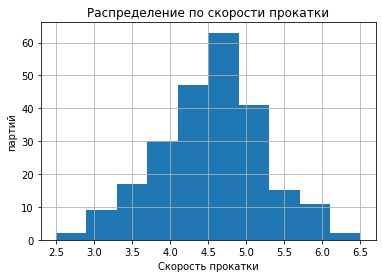

In [50]:
# распределение скорости прокатки также близко к нормальному. Скорость прокатки варьируется от 2.5 до 6.5 м/с.
ax = df['Скорость прокатки'].hist()
ax.set_title('Распределение по скорости прокатки')
ax.set_xlabel('Скорость прокатки')
ax.set_ylabel('партий')

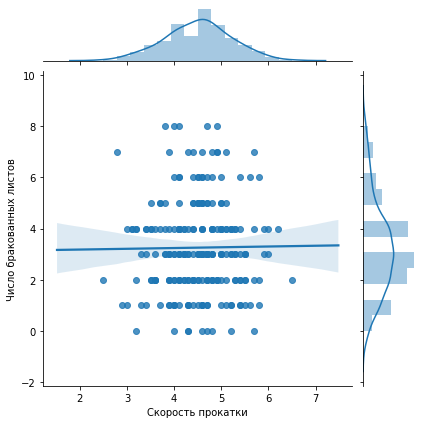

In [52]:
sns.jointplot(x='Скорость прокатки', y='Число бракованных листов', 
              data=df, kind='reg')

## Задание 2

In [78]:
x_data = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\8 Тестовые задания\\Северсталь\\X_data.csv', sep = ';')
y_submit = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\8 Тестовые задания\\Северсталь\\Y_submit.csv', 
                   encoding = 'cp1251', sep = ';', header= None)
y_train = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\8 Тестовые задания\\Северсталь\\Y_train.csv', 
                   encoding = 'cp1251', sep = ';', header= None)

In [75]:
x_data.rename(columns={'Unnamed: 0': 'DT'}, inplace=True)
x_data

,DT,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
5,2015-01-01 00:05:00,213,211,211,342,350,346,479,473,482,360,349,354,243,241,242,163.81,9.22
6,2015-01-01 00:06:00,213,212,211,341,349,346,480,473,482,363,350,354,244,241,242,166.14,9.22
7,2015-01-01 00:07:00,213,212,211,340,348,345,482,473,482,365,350,354,244,241,242,164.38,9.22
8,2015-01-01 00:08:00,213,212,211,339,347,345,483,473,482,367,350,354,244,241,242,163.89,9.22
9,2015-01-01 00:09:00,213,212,211,338,347,345,484,473,483,369,350,354,245,241,242,162.82,9.22


In [76]:
y_train.rename(columns={0: 'DT', 1: 'Quality'}, inplace=True)
y_train

,DT,Quality
0,2015-01-04 00:05:00,392
1,2015-01-04 01:05:00,384
2,2015-01-04 02:05:00,393
3,2015-01-04 03:05:00,399
4,2015-01-04 04:05:00,400
5,2015-01-04 05:05:00,417
6,2015-01-04 06:05:00,408
7,2015-01-04 07:05:00,404
8,2015-01-04 08:05:00,405
9,2015-01-04 09:05:00,405


In [79]:
y_submit

,0,1
0,2018-05-04 00:05:00,420
1,2018-05-04 01:05:00,420
2,2018-05-04 02:05:00,420
3,2018-05-04 03:05:00,420
4,2018-05-04 04:05:00,420
5,2018-05-04 05:05:00,420
6,2018-05-04 06:05:00,420
7,2018-05-04 07:05:00,420
8,2018-05-04 08:05:00,420
9,2018-05-04 09:05:00,420
